# Statistics: The Science of Decisions Project Instructions

## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.


In [1]:
# Importing the needed libraries
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib

%precision 3
# Reading the data file
stroopdata = pd.read_csv(r"stroopdata.csv")

In [2]:
path = r'stroopdata.csv'
# Change the path to the location where the chopstick-effectiveness.csv file is located on your computer.
# If you get an error when running this block of code, be sure the chopstick-effectiveness.csv is located at the path on your computer.

dataFrame = pd.read_csv(path)
dataFrame

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


# Questions For Investigation

### 1. What is our independent variable? What is our dependent variable?
Our independent variable is the variable we manipulate during the experiment. In this case, it is the Congruent/Incongruent condition. The dependent variable is the variable we are measuring. In this investigation, it is the number of seconds that each participant takes to read the list of words.

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
We can perform a t-test given that the size of our sample is less than 30 and The population standard deviation is unknown (estimated from your sample data). Moreover, we perform a dependent t-test given that in our case for same subject has been recorded a time in the each condition: a congruent words condition, and an incongruent words condition. A dependent t-test compares the means of two related groups to detect whether there are any statistically significant differences between these means. In particular, the first related group consists of the subjects who performing congruent task and the second related group consists of the same subjects, but their performance is relative to incongruent task.
The null hypothesis(H0) that there are no significate differences between population average response time in the case congruent words (µC) and in the case incongruent words (µI).The altenative hypothesis(Ha) that there are significate differences between population average response time in the case congruent words (µC) and in the case incongruent words (µI). We can express this as follows:
                                                   - H0: µC = µI

                                                   - HA: µC ≠ µI
                                                   
There is an important "assumptions" that underpin the dependent t-test. The distribution of the differences between response time in the case congruent words (µC) and in the case incongruent words (µI) needs to be approximately normally distributed. We subtract each individuals' response time score in one group from their score in the other related group and then testing for normality.

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.
We will use some Python code to answer the remaining questions.

In [3]:
stroopdata.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

In [4]:
# Using parameter ddof=0, means I am taking the standard deviation of the sample (this dataset)
# & Not estimating the standard deviation of the population based on the sample.
stroopdata.std(ddof = 0)

Congruent      3.484416
Incongruent    4.696055
dtype: float64

The median and standard deviation for the congruent experiment is {{stroopdata.median()['Congruent']}} and {{stroopdata.std(ddof=0)['Congruent']}} respectively. For the incongruent experiment the median is {{stroopdata.median()['Incongruent']}} and the standard deviation is {{stroopdata.std(ddof=0)['Incongruent']}}.

### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.
First, let's start by making a boxplot (see below). We can see that the results for the Incongruent conditions have generally higher values than the congruent conditions. There are some individuals that under congruent conditions took longer time than the median of the incongruent conditions. There are two outliers in the incongruent conditions experiment.

/Users/olivia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


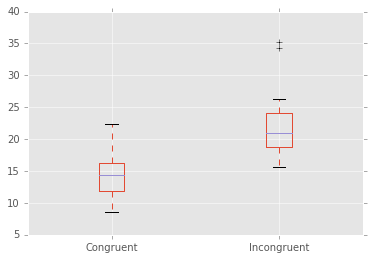

In [5]:
return_type='axes'
%matplotlib inline
matplotlib.style.use('ggplot');
stroopdata.boxplot();


Another way of visualizing the data is by creating a histogram (see below). On the histogram we can see again that the median time for the congruent conditions is lower than the incongruent conditions. Both distributions seem to have a positive skew. However, the number of individuals is relatively low, which makes the histogram not have a nicely defined shape.

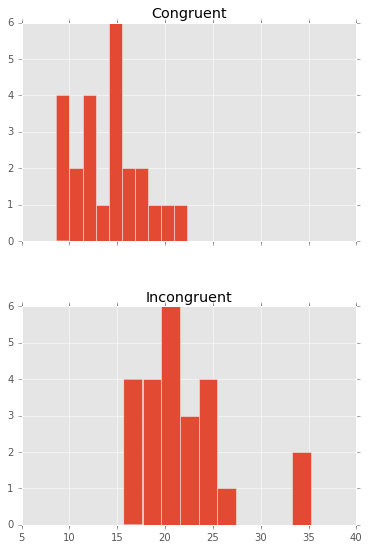

In [6]:
stroopdata.hist(sharex = True, layout=(2, 1), figsize=(6,9));

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?
We will use 95% as our confidence level. This means, that for a two-tailed t-test, the critical t value is:

In [7]:
df = stroopdata.count()[0]-1 #degrees of freedom
t_critical = stats.t.ppf(0.975, df) #Two tailed critical t
print("df =", df)
print("t_critical = ", t_critical)

df = 23
t_critical =  2.06865761042


A paired-samples t-test was performed to compare the time to complete the reading task in the congruent and incongruent conditions.

In [8]:
t_statistic, p_value = stats.ttest_rel(stroopdata["Congruent"], 
                                       stroopdata["Incongruent"])
print("T statistic = ", t_statistic)
print("p_value = ", p_value)

T statistic =  -8.02070694411
p_value =  4.10300058571e-08


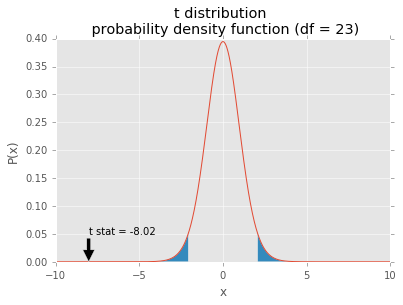

In [9]:
# Plot distribution
rng = np.arange(-10, 10, 0.001)
t_dist = stats.t(df).pdf
plt.xlabel("x")
plt.ylabel("P(x)")

plt.plot(rng, t_dist(rng))
# Plot critical region
plt.fill_between(rng, t_dist(rng), 
                where=np.logical_or(rng < -t_critical,rng > t_critical))
# Plot t statistic of t-test
plt.title("t distribution \n probability density function (df = 23)")
plt.annotate("t stat = {:.2f}".format(t_statistic), 
             xy=(t_statistic, 0), 
             xytext=(t_statistic, 0.05),
             arrowprops=dict(facecolor="black"))

plt.show()

There is a significant difference in the results for the congruent and incongruent tasks (t(23)={{t_statistic}}, p < 0.05). The t-statistic falls inside the critical region. We reject the null hypothesis. This suggests, that under the incongruent conditions, the participants take significantly longer time to read the word list, than in the Congruent conditions.